In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset["YearsExperience"]
y = dataset["Salary"]
print(dataset.head())


   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [3]:
print(X.shape, X[0:3])
X = np.array(X).reshape(-1,1)
print(X.shape, X[0:3])

(30,) 0    1.1
1    1.3
2    1.5
Name: YearsExperience, dtype: float64
(30, 1) [[1.1]
 [1.3]
 [1.5]]


## Split the train and test data

In [4]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=45)
train.shape, test.shape

((24, 2), (6, 2))

In [5]:
X_train = np.array(train["YearsExperience"]).reshape(-1,1)
y_train = np.array(train["Salary"]).reshape(-1,1)

X_test = np.array(test["YearsExperience"]).reshape(-1,1)
y_test = np.array(test["Salary"]).reshape(-1,1)

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print('Coefficients: ', regressor.coef_)
print('Intercept: ',regressor.intercept_)

Coefficients:  [[9608.88153483]]
Intercept:  [25992.57533942]


## Visualising the Training set results

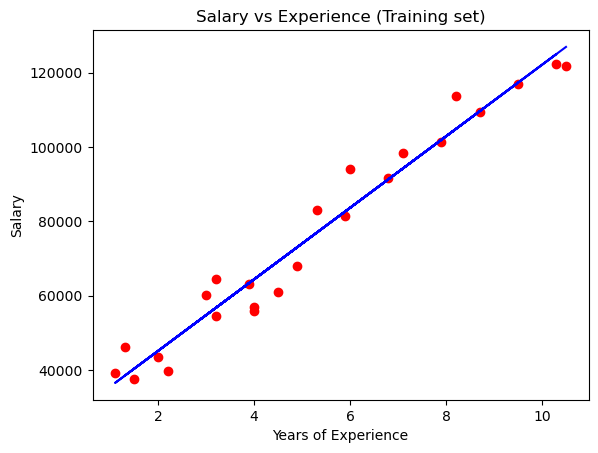

In [7]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Evaluate test set

In [8]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
prediction = regressor.predict(X_test)
print("MAE : ", mean_absolute_error(y_test, prediction))
print("MSE : ", mean_squared_error(y_test, prediction))
print("R2 : ", r2_score(y_test, prediction))

MAE :  6151.718875641914
MSE :  42510267.46721498
R2 :  0.9250487875802144


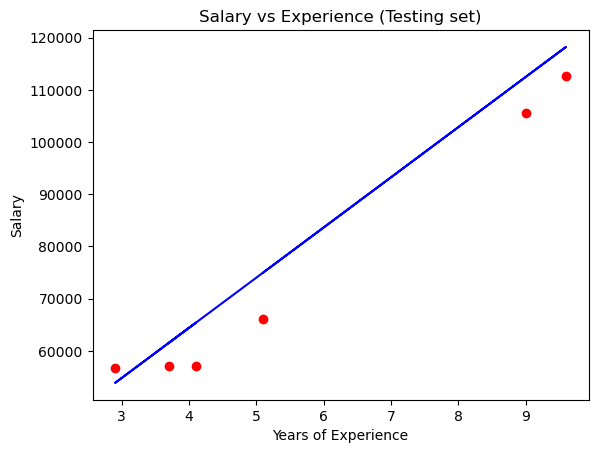

In [9]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, prediction, color = 'blue')
plt.title('Salary vs Experience (Testing set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()